

Epoch 1/50

45/45 [==============================] - 5s 20ms/step - loss: 0.0228
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0022
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0019
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0018
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0017
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.0014
Epoch 8/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 9/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0012
Epoch 10/50
45/45 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 11/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0012
Epoch 12/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0010
Epoch 13/50
45/45 [===============

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


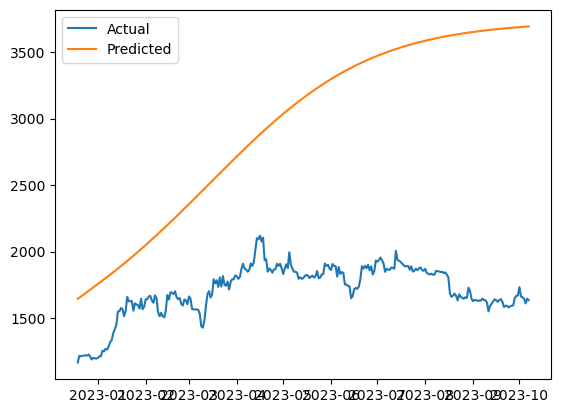

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ETH-USD.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
look_back = 30  # Number of previous time steps to use as input features
X, y = [], []

for i in range(len(scaled_data)-look_back):
    X.append(scaled_data[i:i+look_back, 0])
    y.append(scaled_data[i+look_back, 0])

X, y = np.array(X), np.array(y)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

# Make predictions on test data
test_inputs = scaled_data[len(scaled_data)-look_back:]
test_inputs = test_inputs.reshape(1, -1, 1)
test_predictions = []

for i in range(len(test)):
    prediction = model.predict(test_inputs, batch_size=1)
    test_predictions.append(prediction[0, 0])
    test_inputs = np.concatenate((test_inputs[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Inverse transform the predictions to original scale
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))

# Visualize predictions
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, test_predictions, label='Predicted')
plt.legend()
plt.show()
